In [3]:
import pandas as pd

df = pd.read_json('transaction-data-adhoc-analysis.json')

# convert transaction_date to yyyy-mm format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_date'] = df['transaction_date'].dt.strftime('%Y-%m')

# determine start month of transaction date
min_month = df['transaction_date'].values.astype('datetime64[M]').min()

# determine end month of transaction date
max_month = df['transaction_date'].values.astype('datetime64[M]').max()

# create table with each possible month in the entire period of transaction
df_period = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
df_period.columns = ['month']
df_period['month'] = df_period['month'].dt.strftime('%Y-%m')

# create transaction month column
df['month'] = pd.DatetimeIndex(df['transaction_date']).month

In [4]:
# create list of number of repeating customers per month
repeating = []
def repeating_customers(lastmonth, currentmonth, df):
    monthly_customers = df[df['month'] == lastmonth][df[df['month'] == lastmonth]["name"].isin(df[df["month"] == currentmonth]["name"])]
    unique = monthly_customers.groupby(['name'])['month'].min().reset_index()
    return len(unique)

lastmonth = 0
currentmonth = 1
for i in range(len(df_period)):
    x = repeating_customers(lastmonth + i, currentmonth + i, df)
    repeating.append(x)

# create list of number of inactive customers per month
inactive = []
def inactive_customers(lastmonth, currentmonth, df):
    monthly_customers = df[df['month'] == lastmonth][~df[df['month'] == lastmonth]["name"].isin(df[df["month"] == currentmonth]["name"])]
    unique = monthly_customers.groupby(['name'])['month'].min().reset_index()
    return len(unique)

lastmonth = 0
currentmonth = 1
for i in range(len(df_period)):
    x = inactive_customers(lastmonth + i, currentmonth + i, df)
    inactive.append(x)

# create list of number of engaged customers per month
engaged = []
# create sub-tables for each month
def subtable(month, df):
    temp = df[df['month'] == month]
    #print(temp.to_numpy())
    return  temp
jan = subtable(1, df)
feb = subtable(2, df)
march = subtable(3, df)
april = subtable(4, df)
may = subtable(5, df)
june = subtable(6, df)

engaged0 = jan.groupby(['name','month'])
engaged1 = jan[jan['name'].isin(feb['name'])]
engaged2 = engaged1[engaged1['name'].isin(march['name'])]
engaged3 = engaged2[engaged2['name'].isin(april['name'])]
engaged4 = engaged3[engaged3['name'].isin(may['name'])]
engaged5 = engaged4[engaged4['name'].isin(june['name'])]

engaged.append(len(engaged0))
engaged.append(len(engaged1.groupby(['name', 'month'])))
engaged.append(len(engaged2.groupby(['name', 'month'])))
engaged.append(len(engaged3.groupby(['name', 'month'])))
engaged.append(len(engaged4.groupby(['name', 'month'])))
engaged.append(len(engaged5.groupby(['name', 'month'])))


In [5]:
customers = pd.DataFrame()
customers['month'] = ["January", "February", "March", "April", "May", "June"]
customers['repeat'] = repeating
customers['inactive'] = inactive
customers['engaged'] = engaged
customers = customers.set_index('month')
customers = customers.T
customers

month,January,February,March,April,May,June
repeat,0,5172,5216,5154,5110,5193
inactive,0,1416,1415,1468,1446,1375
engaged,6588,5172,4126,3289,2667,2190


<AxesSubplot:xlabel='month'>

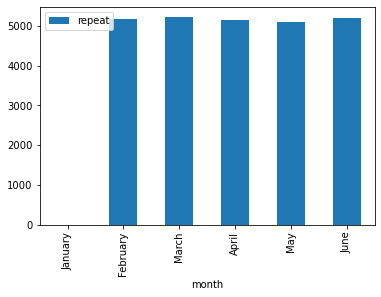

In [12]:
#bar graph of repeating customers per month
repeat_customers = pd.DataFrame()
repeat_customers['month'] = ["January", "February", "March", "April", "May", "June"]
repeat_customers['repeat'] = repeating
repeat_customers = repeat_customers.set_index('month')
repeat_customers.plot(kind = 'bar')

<AxesSubplot:xlabel='month'>

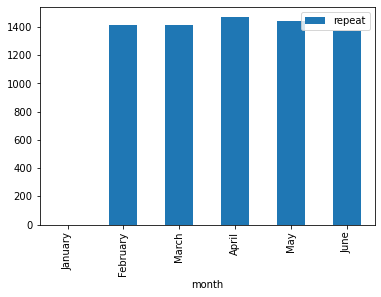

In [13]:
#bar graph of inactive customers per month
inactive_customers = pd.DataFrame()
inactive_customers['month'] = ["January", "February", "March", "April", "May", "June"]
inactive_customers['repeat'] = inactive
inactive_customers = inactive_customers.set_index('month')
inactive_customers.plot(kind = 'bar')

<AxesSubplot:xlabel='month'>

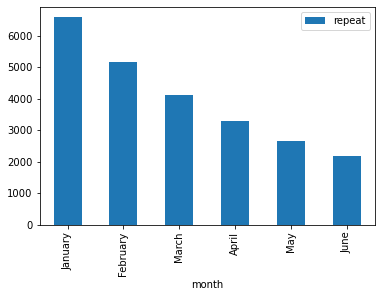

In [14]:
#bar graph of engaged customers per month
engaged_customers = pd.DataFrame()
engaged_customers['month'] = ["January", "February", "March", "April", "May", "June"]
engaged_customers['repeat'] = engaged
engaged_customers = engaged_customers.set_index('month')
engaged_customers.plot(kind = 'bar')